# Multiple Linear Regression Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

***The company wants to know:***

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

***Goal:***
- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## Checkpoint 1: Importing Libraries

In [ ]:
#imporitng required packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Importing required Modeling libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# Checkpoint 2: Reading and Understanding Data

In [ ]:
#Read the csv file using pandas
df = pd.read_csv('day.csv')

In [ ]:
#Inspect the dataframe
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#check the shape
df.shape

(730, 16)

In [ ]:
#check dataframe for null and datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
#check the statistical details for the dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
#check the columns of data
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Observation: There are 730 rows and 16 columns in the data set, with no null values.

# Checkpoint 3: Data Cleaning

### 3.1 Removing/Dropping the variables that are of no use for the analysis

- `instant` is just a row instance identifier(Basically an Index)
- `dteday` beacause, we already have `yr` and `month` columns, so `dteday` is of no use for the analysis.
- `casual` and `registered` variables because they all in all describe the target variable and keeping them in the model may result into data leakage.

In [ ]:
# Drop 'instant' variable
df.drop('instant', axis = 1, inplace = True)

In [ ]:
# Before droping the 'dteday' column lets first understand the variable and see if it has something important to deliver. 
print(df.dteday)

# from the output presented by the above code snipet, it can be derived that each row of the dteday column represents a single non-repeating date. 
# Hence we can say that there are in total 730 days. 

0      01-01-2018
1      02-01-2018
2      03-01-2018
3      04-01-2018
4      05-01-2018
          ...    
725    27-12-2019
726    28-12-2019
727    29-12-2019
728    30-12-2019
729    31-12-2019
Name: dteday, Length: 730, dtype: object


In [ ]:
# Dropping dteday as we have already have month and weekday columns to work with
df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column
df.drop(['casual','registered'], axis = 1, inplace = True)

# Inspect the changes
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 3.2 Inspecting Categorical variables and the correlation between numerical variables

In [ ]:
# Inspecting 'season' column
print("Season:\n",df.season.value_counts(), '\n')

# Inspecting 'weathersit' column
print("Weathersit:\n",df.yr.value_counts(),'\n')

# Inspecting 'month' column
print("Month:\n",df.mnth.value_counts(),'\n')

# Inspecting 'holiday' column
print("Holiday:\n",df.holiday.value_counts(),'\n')

# Inspecting 'weekday' column
print("Weekday:\n",df.weekday.value_counts(),'\n')

# Inspecting 'workingday' column
print("Working day:\n",df.workingday.value_counts(), ' \n')

Season:
 3    188
2    184
1    180
4    178
Name: season, dtype: int64 

Weathersit:
 1    365
0    365
Name: yr, dtype: int64 

Month:
 12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64 

Holiday:
 0    709
1     21
Name: holiday, dtype: int64 

Weekday:
 6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64 

Working day:
 1    499
0    231
Name: workingday, dtype: int64  



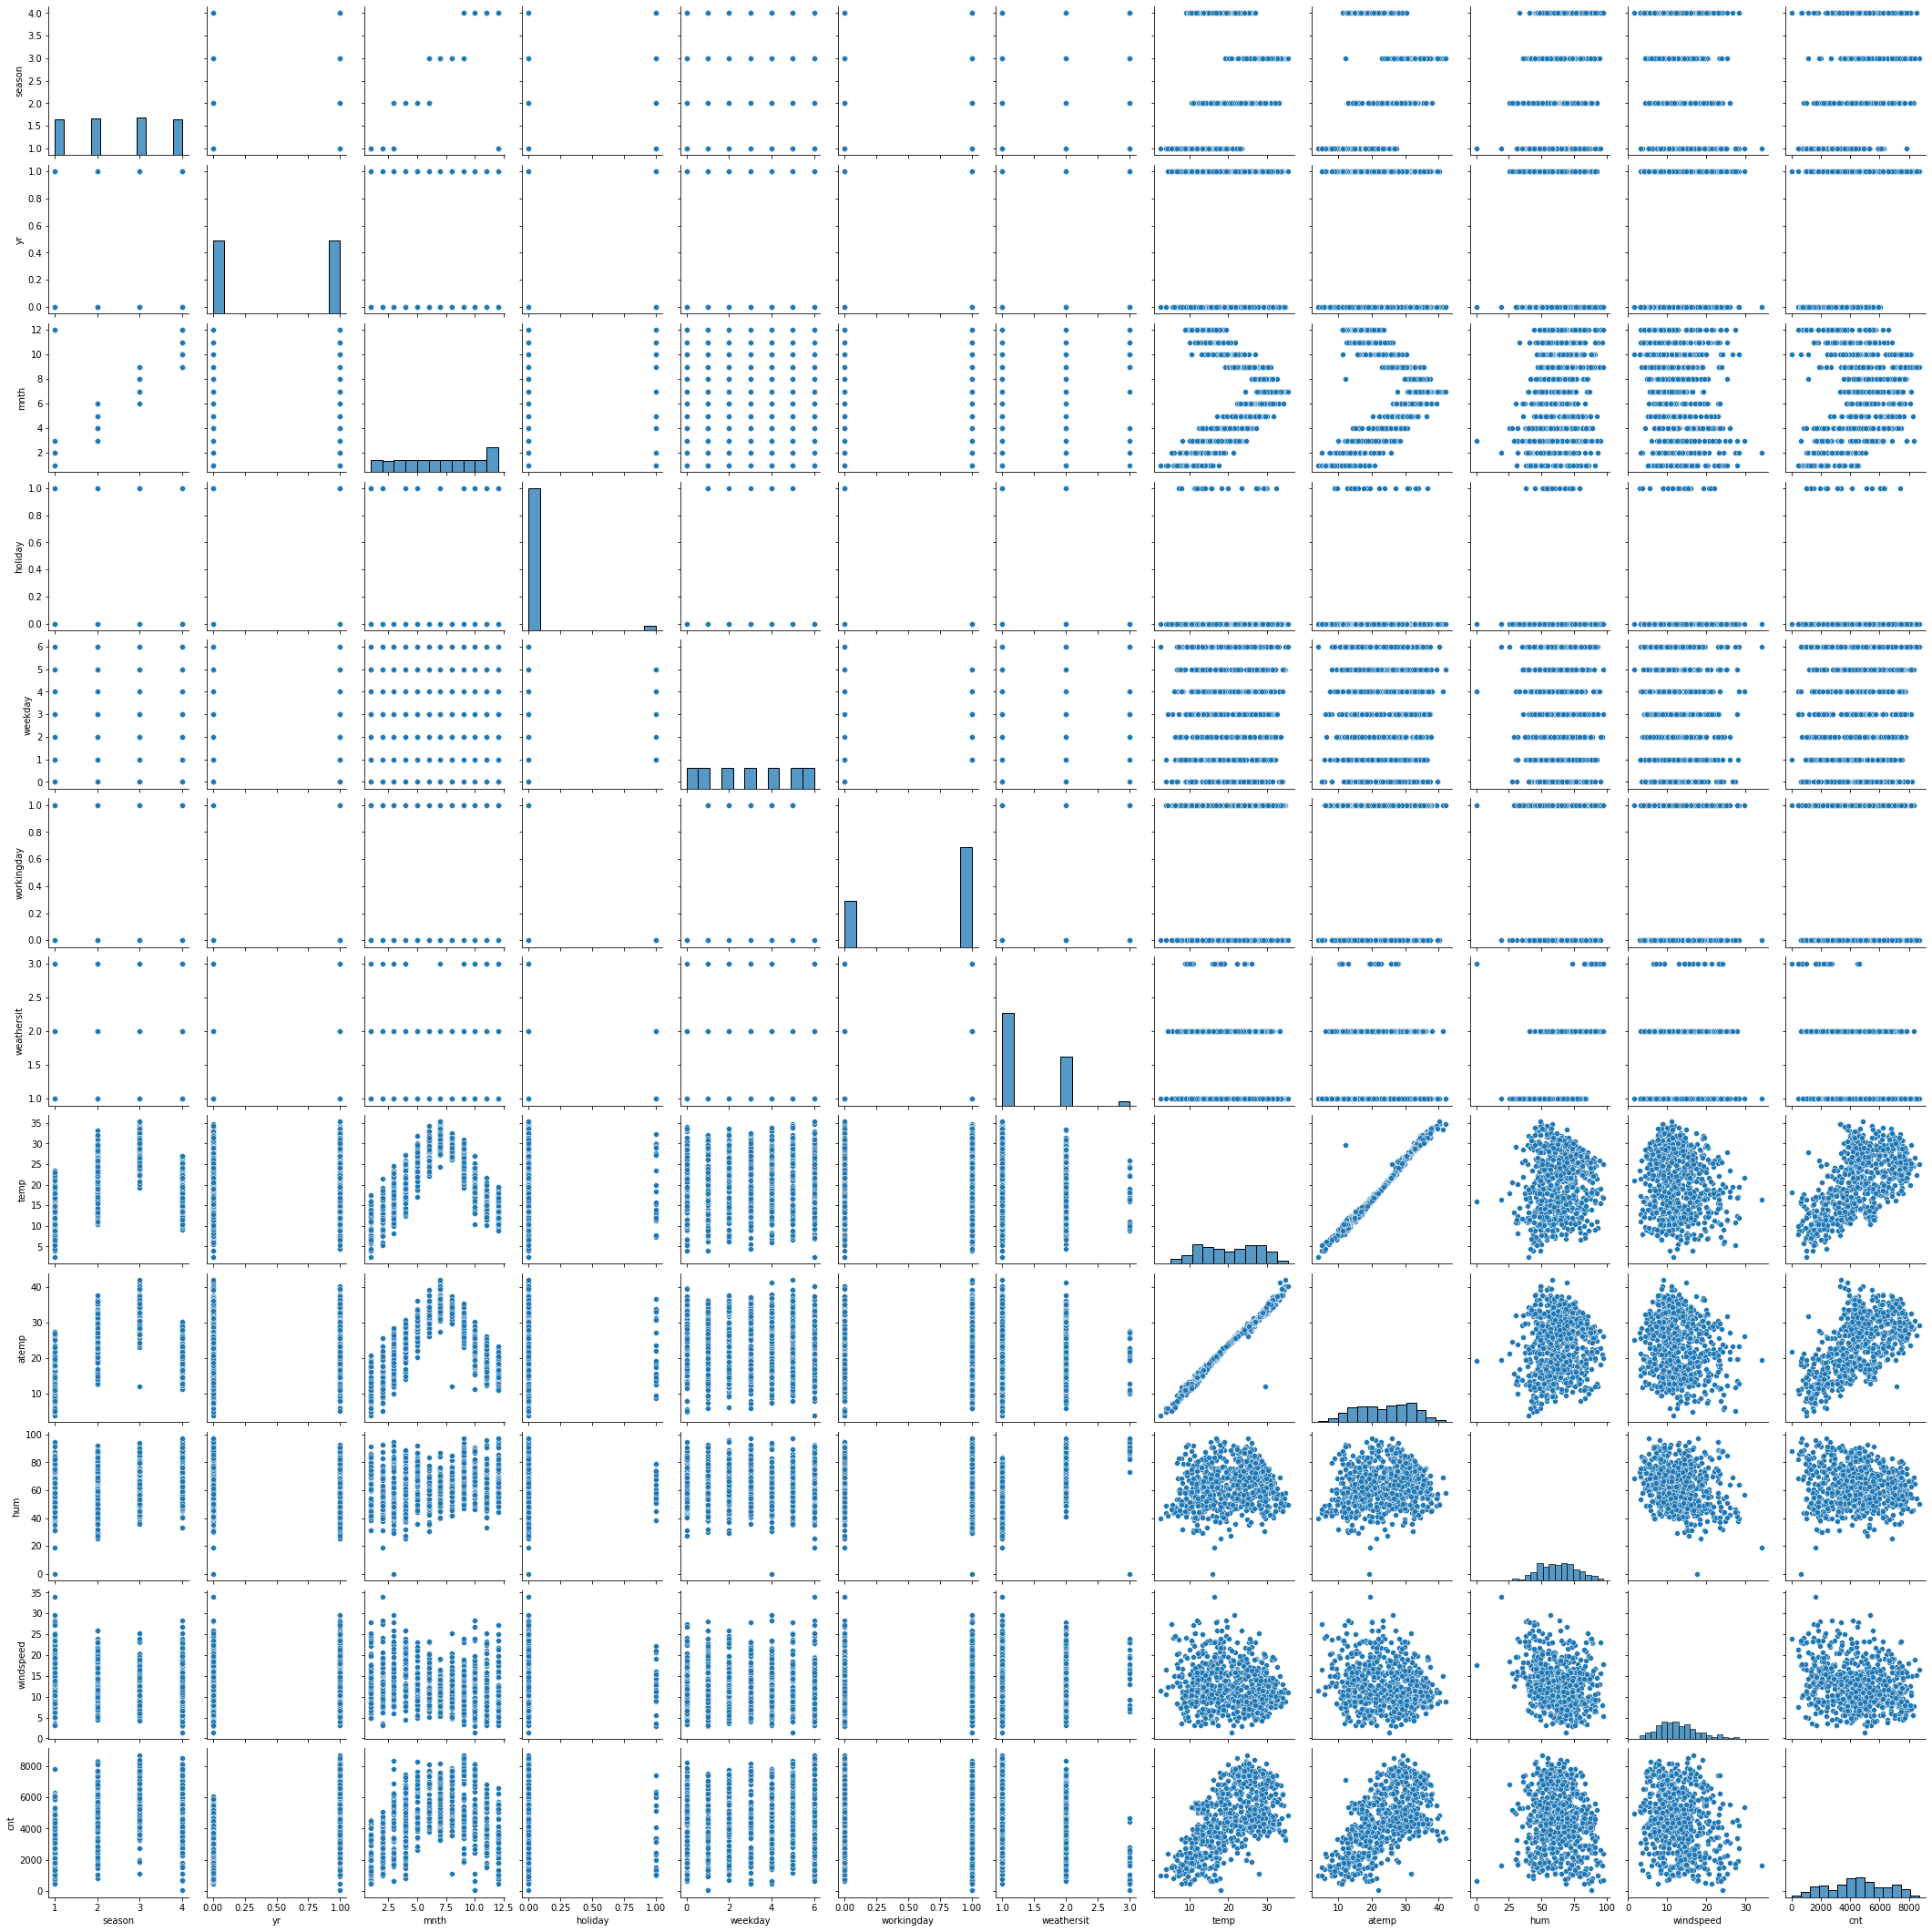

In [ ]:
# Visualizing numeric Variables
sns.pairplot(df)
plt.show()

_`Observation`_

- we can see that features like `temp and atemp` are highly correlated with `cnt` which is our target variable.

- Also, features like `weather, season, yr, mnth, weekday, holiday, working day` should be categorical.

### 3.3 Handling Outliers

In [ ]:
#Print number of unique values in all columns
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

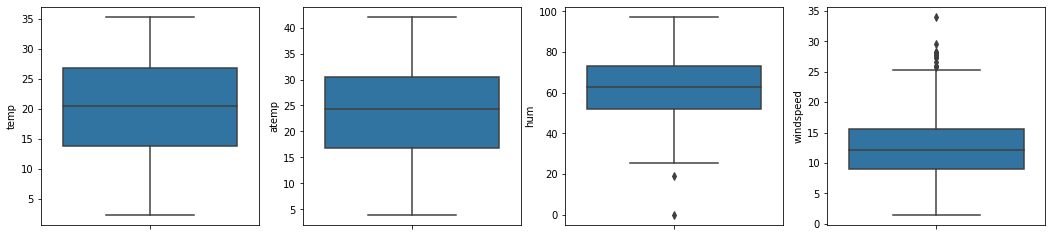

In [ ]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

_`Observation`_

- From these plots, we can see there are no outliers to be handled.

# Checkpoint 4. Exploratory Data Analysis

In [ ]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


_`Observations`_

- Categorical columns are - `season` , `yr` , `mnth` , `holiday` , `weekday` , `workingday` , `weathersit`

#### 4.1 Convert the above seen columns into categories to further classify them into dummy variables.

In [ ]:
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


#### _`Observations`_

- Observe that we are not converting the columns `Holiday` and `Workingday` because they are already classified into 2 categorical columns namely, `0` and `1`

#### 4.2 Inspect the correlation coefficients between the continuos variables.

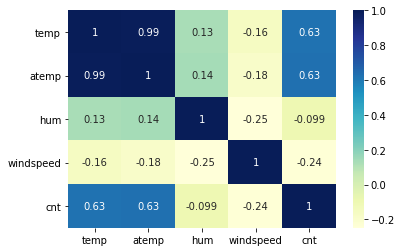

In [ ]:
# Checking continuous variables correlation
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(),  cmap="YlGnBu", annot = True)
plt.show()

#### _`Observation`_ 

- Here we see that temp and atemp has correlation more than .99 (highly correlated)

#### 4.4 Draw Correlation Heatmap between all the numeric variables and see if we can find something intresting.

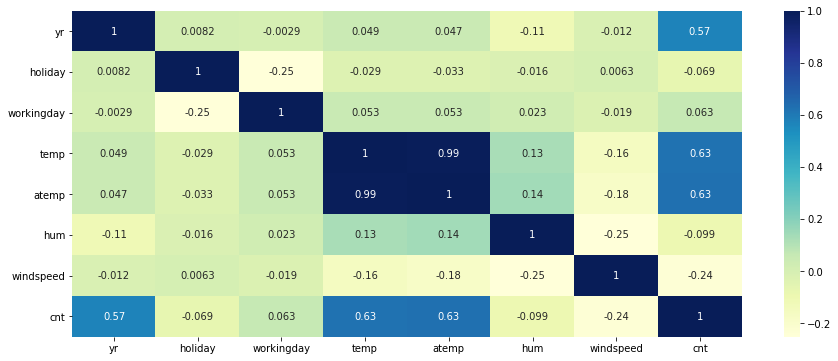

In [ ]:
#Calculate Correlation
corr = df.corr()
plt.figure(figsize=(15,6))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

#### _`Obervation`_

- `Again` , `temp` , `atemp` , and `yr` seems to be highly correlated with the target variable `cnt`

#### 4.5 Analysing Categorical Variabels with target variables 

(0, 'season')
(1, 'yr')
(2, 'mnth')
(3, 'holiday')
(4, 'weekday')
(5, 'workingday')
(6, 'weathersit')


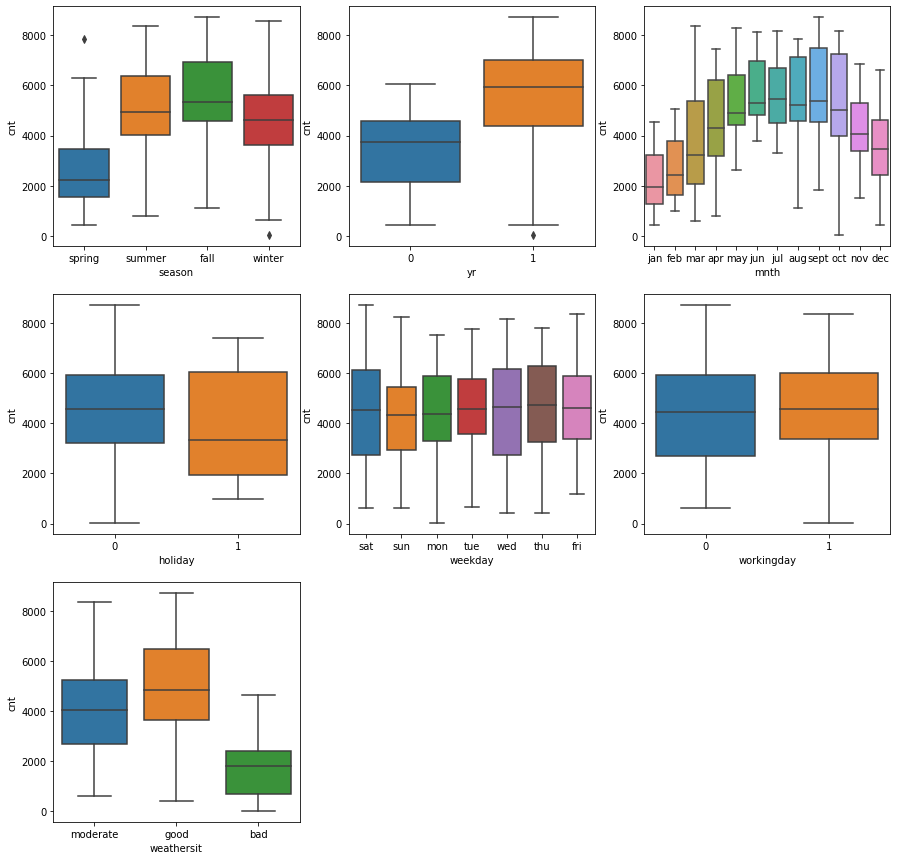

In [ ]:
# Boxplot for categorical variables

cat_variables = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(cat_variables):
  print(i)
  plt.subplot(3,3,i[0]+1)
  sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

#### _`Observation`_:
##### Here many insights can be drawn from the plots
- 1) Season 2,3 `(summer and fall)` has highest demand for bikes.
- 2) The demand has grown substantially for the 2nd year (2019), which indirectly can mean that the bussiness is booming year over year.
- 3) Again, what we saw in the `season` data demand is high in the months of `summer and fall` seaons ie: from April to September.
- 4) Demand decreases substantially when there is a holiday.
- 5) Weekdays has no effect on the demand of the bikes, throughtout the week the demand mostly remains the same. 
- 6) No trend seen for workinday as well.
- 7) The demand for bikes are more when the weather is pleasand or moderate, compared to bad weather. 

#### 4.6 Analyse Numeric variable

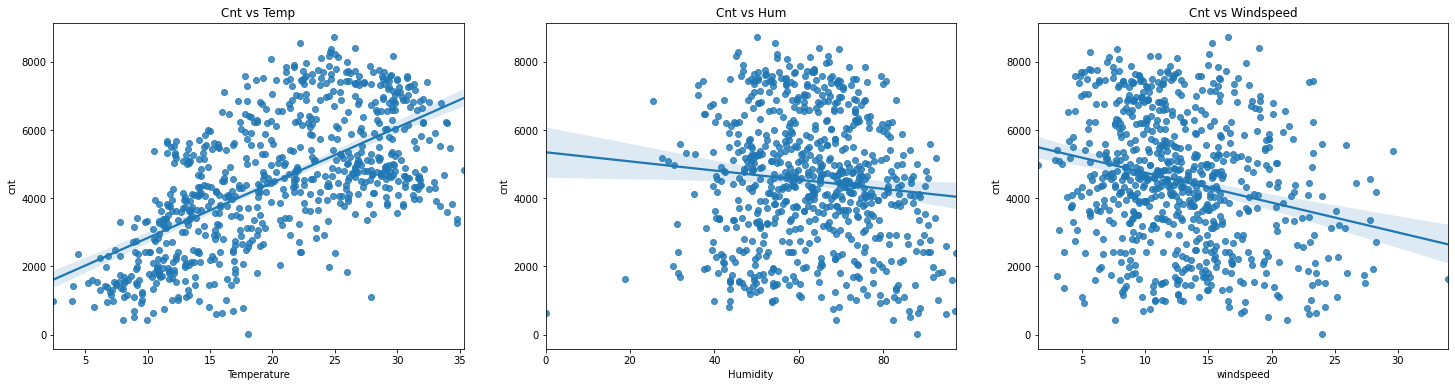

In [ ]:
# Inspect the correlation between `cnt` and `temp` , `hum` , `windspeed`.

plt.figure(figsize = [25,6])
plt.subplot(1,3,1)
plt.title("Cnt vs Temp")
sns.regplot(data=df,y="cnt",x="temp")
plt.xlabel("Temperature")

plt.subplot(1,3,2)
plt.title("Cnt vs Hum")
sns.regplot(data=df,y="cnt",x="hum")
plt.xlabel("Humidity")

plt.subplot(1,3,3)
plt.title("Cnt vs Windspeed")
sns.regplot(data=df,y="cnt",x="windspeed")

#### _`Observation`_:

- Temp is very highly correlated with `cnt` good for the analysis.
- There is not much correlation between, `Hum` or `Windspeed` with `cnt` as we have seen earlier. but, the `cnt` values seems to be getting affected with increase or decrease in `hum` or `windspeed`.

# 5. Data Preparation for MLR

#### 5.1 Create dummy variables for all categorical variables

In [ ]:
# Dropping the first columns as (p-1) dummies can explain p categories.
# In weathersit first column was not dropped so as to not lose the info about severe weather situation.

df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

In [ ]:
# Insect the data
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


# 6. Model Building

## 5.1 Split Data into train and test

In [ ]:
#y = target variable
y=df.pop('cnt')

#X = independent variables
X=df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Checking shape for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


### 5.2 Feature Scaling for Continuous variables

Scaling is done, to make the gradient descent better understand the data, and to bring all the variables on the same scale.

Following columns are continous to be scaled
`temp` , `hum` , `windspeed`

In [ ]:
num_vars = ['temp','atemp','hum','windspeed']

# Normalized scaler 
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [ ]:
#Inspect stats for Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.500978,0.029354,0.690802,0.514715,0.510461,0.514253,0.373655,0.244618,0.258317,0.240705,0.084149,0.082192,0.074364,0.088063,0.076321,0.086106,0.09002,0.086106,0.082192,0.086106,0.076321,0.144814,0.144814,0.135029,0.140900,0.142857,0.154599,0.023483,0.641879,0.334638
std,0.500489,0.168963,0.462616,0.242919,0.227558,0.194524,0.192691,0.430282,0.438138,0.427930,0.277883,0.274926,0.262619,0.283664,0.265771,0.280795,0.28649,0.280795,0.274926,0.280795,0.265771,0.352258,0.352258,0.342090,0.348259,0.350270,0.361876,0.151581,0.479918,0.472326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.302420,0.311891,0.362239,0.232054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.500095,0.514071,0.513341,0.353530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.734255,0.704142,0.651165,0.483616,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5.3 Build a Model using Automated approach (RFE)

In [ ]:
# Make an object of the LinearRegression class
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Choose the number of features to be 15 
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [ ]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 6),
 ('mnth_jan', False, 5),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 10),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 7),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 3),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 16),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

- We interprete RFE output based on the `support_` and `ranking_` parameters, if support is false and ranking for that support is highest we eliminate the variable.

## 5.4 Manual elimination

##### Model using statsmodel api

In [ ]:
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

##### Function to calculate VIFs and print them

In [ ]:
#Function to calculate VIFs
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [ ]:
# Print Columns selected by RFE.
X_train.columns[rfe.support_]

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [ ]:
# Columns rejected by RSE
X_train.columns[~rfe.support_]

Index(['holiday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'weekday_mon', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [ ]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [ ]:
X_train_rfe.shape

(511, 15)

# 6. Build Model 

### 6.1 Model 1 - Start with all variables selected by RFE

In [ ]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     154.0
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.16e-175
Time:                        17:35:09   Log-Likelihood:                -4135.3
No. Observations:                 511   AIC:                             8303.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2373.0267    

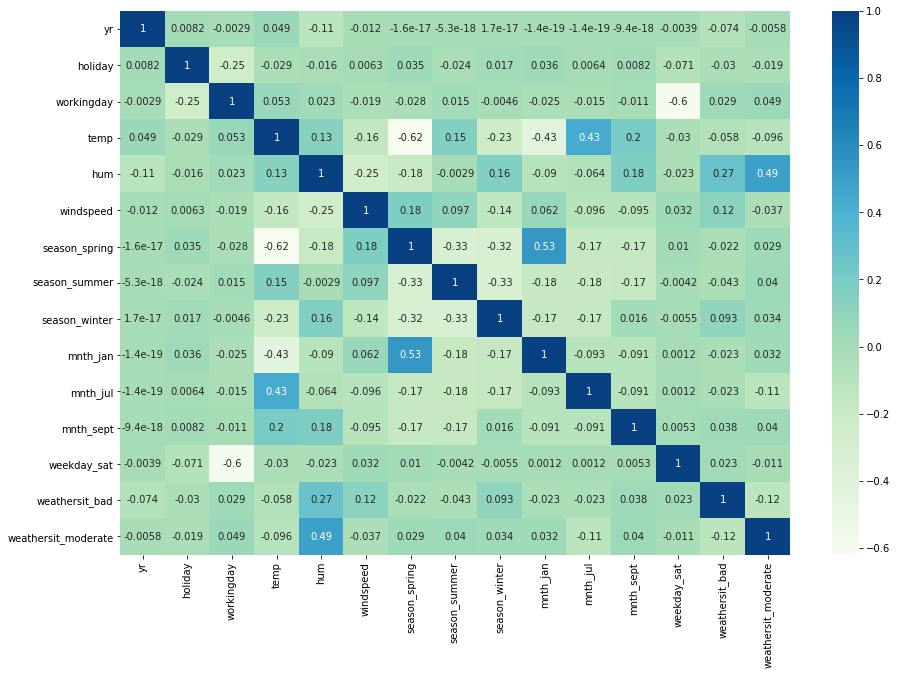

In [ ]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.

plt.figure(figsize = (15,10))
sns.heatmap(df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

## Model 2

In [ ]:
# Dropping the variable `mnth_jan` as it is insignificant as it has high p-value

cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     164.5
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          4.53e-176
Time:                        17:35:10   Log-Likelihood:                -4136.4
No. Observations:                 511   AIC:                             8303.
Df Residuals:                     496   BIC:                             8366.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2301.5720    

## Model 3

#### All the columns have p-value > .05 so checking VIFs

In [ ]:
# Dropping the variable `hum` as it is insignificant as it has VIF

cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     169.8
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.78e-173
Time:                        17:35:11   Log-Likelihood:                -4145.7
No. Observations:                 511   AIC:                             8319.
Df Residuals:                     497   BIC:                             8379.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1846.2373    

## Module 4

In [ ]:
# Dropping the variable `holiday` as it is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     183.2
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          6.65e-174
Time:                        17:35:11   Log-Likelihood:                -4147.0
No. Observations:                 511   AIC:                             8320.
Df Residuals:                     498   BIC:                             8375.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1786.7548    

## Model 5

In [ ]:
# Dropping the variable `season_summer` as it is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring','season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate', 'mnth_jul']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     198.3
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          3.35e-174
Time:                        17:35:11   Log-Likelihood:                -4149.0
No. Observations:                 511   AIC:                             8322.
Df Residuals:                     499   BIC:                             8373.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2098.8140    

## Model 6

In [ ]:
# Dropping the variable `temp` as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'mnth_jul', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     140.6
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.51e-138
Time:                        17:35:11   Log-Likelihood:                -4236.6
No. Observations:                 511   AIC:                             8495.
Df Residuals:                     500   BIC:                             8542.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4568.2908    

## Model 7  (Final Model)

In [ ]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate', 'temp']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     254.7
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.74e-171
Time:                        17:35:11   Log-Likelihood:                -4164.3
No. Observations:                 511   AIC:                             8347.
Df Residuals:                     502   BIC:                             8385.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1972.3984    

#### _`Observation`_
Here VIF seems to be almost accepted. p-value for all the features is  almost 0 and Adjusted_R2 is 0.799.


In [ ]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1


In [ ]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1972.3984427166647 [ 1978.64011613 -1028.63595608  -581.08502477   385.20458341
   430.20137239 -2392.90344127  -598.05590181  3797.74946769]


## Step 7. Model Evaluation 
### 7.1 Normality Check (Residual Analysis)





In [ ]:
y_train_pred = lr.predict(X_train[cols])

In [ ]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

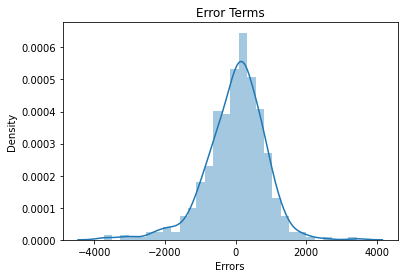

In [ ]:
plot_res_dist(y_train, y_train_pred)

#### Errors are normally distribured here with mean 0. So everything seems to be fine

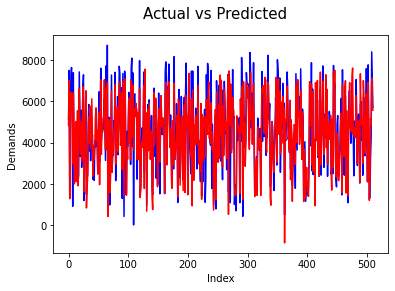

In [ ]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and Predicted result following almost the same pattern so this model seems good enough

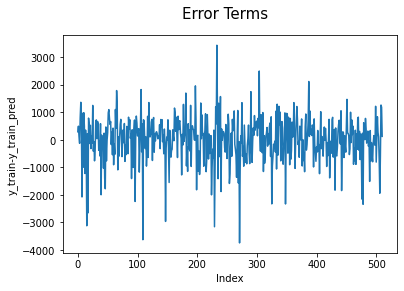

In [ ]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Here,If we see the error terms are independent of each other.

In [ ]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8023095523271442

### _`Observation`_
R2 Same as we obtained for our final model

### 7.2 Linearity Check

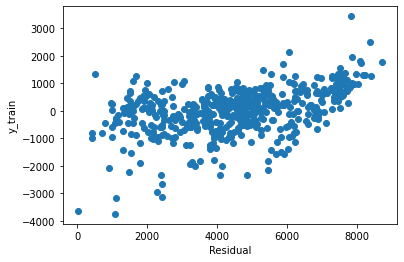

In [ ]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### 7.3 Predict values for test data set

In [ ]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [ ]:
#Columns from our final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

### 7.4 R-Squared value for test predictions

In [ ]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.837770482924838

##### _`Observation`_ 
R2 value for predictions on test data (0.837) is almost same as R2 value of train data(0.802). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

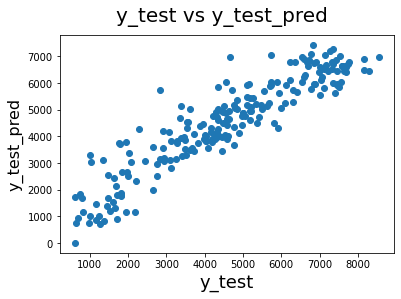

In [ ]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)

####  _`Observation`_
Error term does not vary much as the value of the predictor variable changes.

### 7.5 Homoscedacity

Text(0, 0.5, 'Residuals')

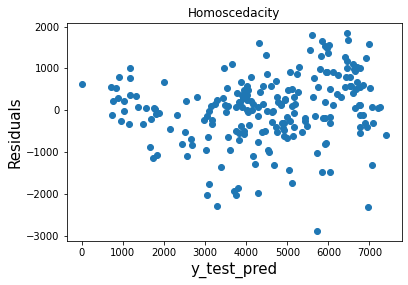

In [ ]:
#
residuals = (y_test - y_test_pred)
plt.scatter(x = y_test_pred, y = residuals)
plt.title("Homoscedacity")
plt.xlabel("y_test_pred",fontsize = 15)
plt.ylabel("Residuals", fontsize = 15)

_`Observation`_

- By looking at the above scatter plot we can say that theres no relation between the residuals and the predicted variables, hence our `Homoscedacity` accumption is true in our model. 

### 7.6 Plot Test vs Predicted test values

In [ ]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

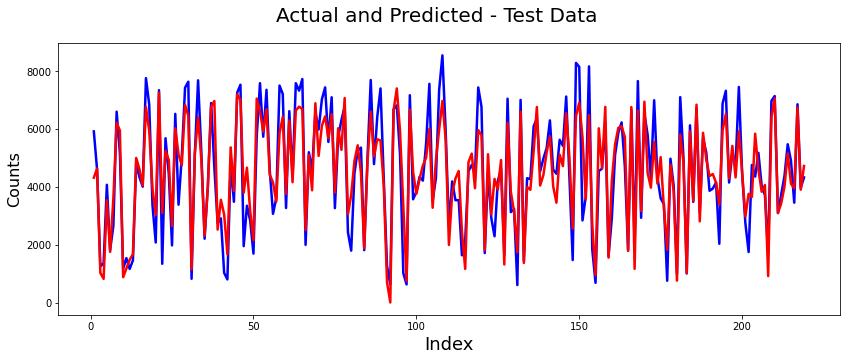

In [ ]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

#### _`Observation`_
As we can see predictions for test data is very close to actuals

### 7.7 Plot Error Terms for test data

In [ ]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)           
    plt.xlabel('Index', fontsize=18)                  
    plt.ylabel('Counts - Predicted Counts', fontsize=16)          

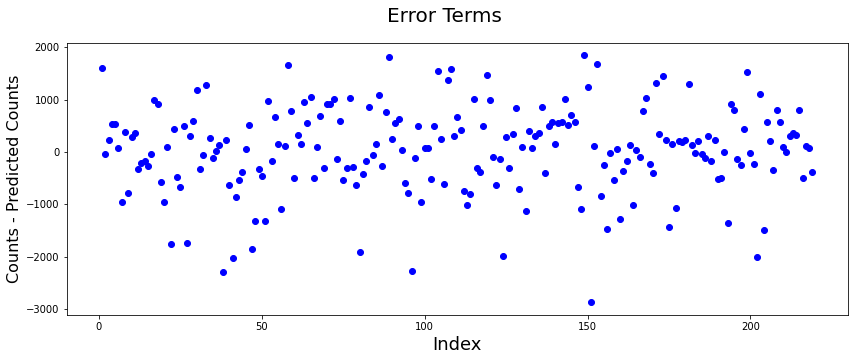

In [ ]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

#### _`Observation`_
As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

### 8. Making Predictions

### 8.1 Intrepretting the Model

#### Let us go with interpretting the RFE with Manual model results as we give more importance to imputation

In [ ]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     254.7
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.74e-171
Time:                        17:35:13   Log-Likelihood:                -4164.3
No. Observations:                 511   AIC:                             8347.
Df Residuals:                     502   BIC:                             8385.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1972.3984    

### Interepretation of results

### Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain,  they can use this time to maintain some % of bikes as te bussiness wuld be less.


### _`Conclusion`_
Significant variables to predict the demand for shared bikes
- temp
- Season
- months(July, September)
- Year (2019)
- weathersit( Light Snow, Mist + Cloudy)